# Numpy methods for Streaming and Collision

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### The streaming operator
For this purpose we need the numpy method roll of arrays

In [4]:
# Create an array and print it
a = np.arange(5*7)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]


In [5]:
# reshape it to a rectangular array
b = a.reshape((5,7))
print(b)

[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]]


In [6]:
c_ca: np.array = np.array([[0, 0], [1, 0], [0, 1], [-1, 0], [0, -1], [1, 1], [-1, 1], [-1, -1], [1, -1]])


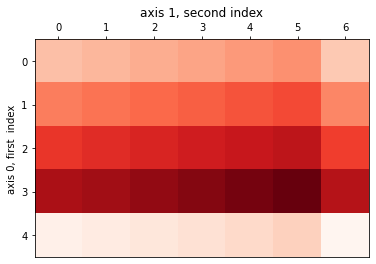

In [8]:
%matplotlib inline
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.labeltop'] = True
# Roll it in different direction
c = np.roll(b,shift = c_ca[7],axis = (1,0))
# print(c)
#
column_labels = list('0123456')
row_labels = list('01234')
#data = np.random.rand(5, 6)
fig, ax = plt.subplots()
data = c/a[-1]
heatmap = ax.pcolor(data, cmap=plt.cm.Reds)
# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
#
ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
ax.set_ylabel('axis 0, first  index')
ax.set_title('axis 1, second index')
plt.show() 

In [10]:
(c/a[-1]).shape

(5, 7)

In [10]:
f_cij = np.ones((9,5,7))
c_ca = np.array([[0, 1, 0, -1, 0, 1, -1, -1, 1],
                 [0, 0, -1, 0 ,1, -1, -1, 1, 1]]).T     # These are the velocities of the channels
#
for k in np.arange(9):
    f_cij[k] = np.roll(f_cij[k],c_ca[k],axis = (1,0))

### Collision operator
To calculate the outcome of the collision 
$$ f_i+\omega(f_i^{eq}-f_i)$$
We need to know the average velocity at $\mathbf{r}$ and the denisty $n(\mathbf{r})$.

In [11]:
w_c = np.array([4/9,1/9,1/9,1/9,1/9,1/36,1/36,1/36,1/36])  # equilibrium occupation numbers
c_ca = np.array([[0, 1, 0, -1, 0, 1, -1, -1, 1],
                 [0, 0, -1, 0 ,1, -1, -1, 1, 1]]).T     # These are the velocities of the channels
f_cij[:] = w_c[:,np.newaxis,np.newaxis]
f_cij[1] += 0.01
f_cij[3] -= 0.01

In [12]:
u_aij = np.einsum('cij,ca->aij',f_cij,c_ca)

In [13]:
for c in np.arange(9): f_cij[c] = w_c[c]

In [14]:
u_aij

array([[[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
        [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
        [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
        [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
        [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]]])

In [15]:
np.einsum('cij->ij',f_cij)

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

In [16]:
u_aij = np.einsum('cij,ca->aij',f_cij,c_ca)

In [17]:
u_aij

array([[[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]]])

In [18]:
rho_ij = np.einsum('cij->ij',f_cij)

In [19]:
rho_ij

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

In [37]:
from pylbm import lbm
eps = 0.01
r_shape = (3, 5)
r_value = 0.5

r_ij =eps* np.random.randn(r_shape[0],r_shape[1])
r_ij[:, :] += r_value
r_ij

array([[0.50020239, 0.49062554, 0.49345948, 0.51130222, 0.49919631],
       [0.48941902, 0.48725415, 0.5002641 , 0.51493633, 0.49977161],
       [0.52232276, 0.50562467, 0.49668832, 0.51121856, 0.49146409]])

In [40]:
r_ij.mean()

0.5009166395397856